# CapsNets on Fashion Cifar-10 dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
(X_train, y_train), (X_test , y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0
X_train = tf.cast(X_train, dtype=tf.float32)

X_test = X_test / 255.0
X_test = tf.cast(X_test, dtype=tf.float32)

y_train = y_train.reshape((len(y_train),))
y_test = y_test.reshape((len(y_test),))

# Reducing the size of the samples for faster training
X_train = X_train[:1024]
y_train = y_train[:1024]

X_test = X_test[:512]
y_test = y_test[:512]

X_train.shape, y_train.shape

(TensorShape([1024, 32, 32, 3]), (1024,))

1024 images of size 32x32 over three channel

## Sample visualisation

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

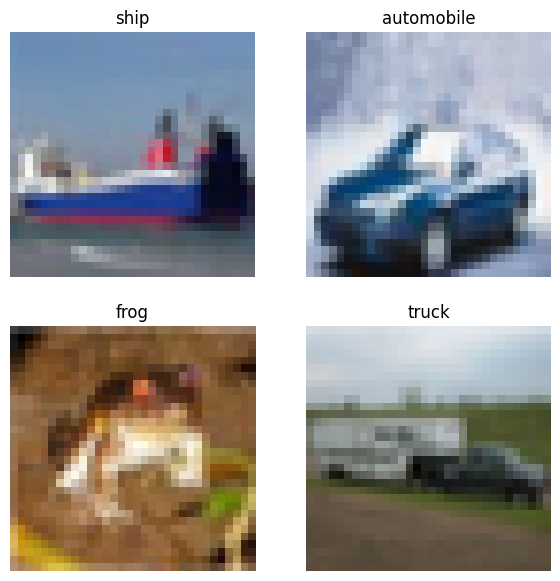

In [4]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [5]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [6]:
params = {
    "dataset": "CIFAR-10",
    "input_shape": (32, 32, 3),
    "epochs": 20,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 256,
    "no_of_primary_capsules": 18,
    "primary_capsule_vector": 8,
    "no_of_secondary_capsules": 10,
    "secondary_capsule_vector": 16,
    "r":3,
    "train_metrics": ['accuracy', 'precision', 'recall', 'f1']
}

model = CapsNet(**params)
model.compile()
model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam())

Epoch 1/20: 100%|██████████| 16/16 [00:12<00:00,  2.31it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 2/20: 100%|██████████| 16/16 [00:07<00:00,  2.29it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 3/20: 100%|██████████| 16/16 [00:06<00:00,  2.30it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is il

{'accuracy': ListWrapper([0.1083984375, 0.1328125, 0.208984375, 0.2255859375, 0.244140625, 0.283203125, 0.3427734375, 0.400390625, 0.3857421875, 0.40625, 0.47265625, 0.4970703125, 0.52734375, 0.5390625, 0.591796875, 0.5947265625, 0.6474609375, 0.6904296875, 0.7333984375, 0.7626953125]),
 'precision': ListWrapper([0.01289627713022508, 0.07851977512771519, 0.15140046967879328, 0.19479485448785122, 0.31120612953046967, 0.3248815593222454, 0.41173623645370927, 0.4123312768214228, 0.4333317710520183, 0.41846905369054016, 0.4783935156042456, 0.49983661194426493, 0.5343756935950297, 0.5560419793429819, 0.6055955732961873, 0.6226575256116588, 0.6489566254983222, 0.6991277259480394, 0.7474864552358367, 0.7672972847042848]),
 'recall': ListWrapper([0.1083984375, 0.1328125, 0.208984375, 0.2255859375, 0.244140625, 0.283203125, 0.3427734375, 0.400390625, 0.3857421875, 0.40625, 0.47265625, 0.4970703125, 0.52734375, 0.5390625, 0.591796875, 0.5947265625, 0.6474609375, 0.6904296875, 0.7333984375, 0.762

In [8]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/caps_net-CIFAR-10/assets


INFO:tensorflow:Assets written to: ../saved_models/caps_net-CIFAR-10/assets


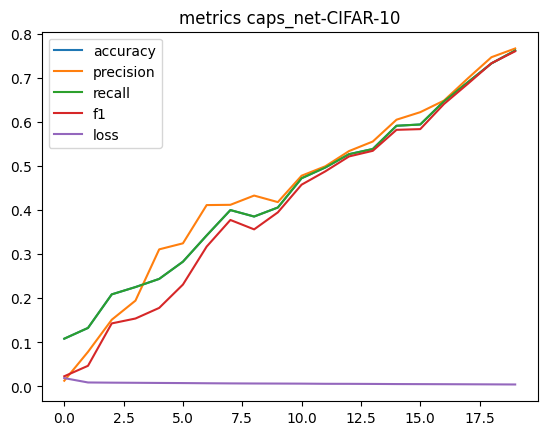

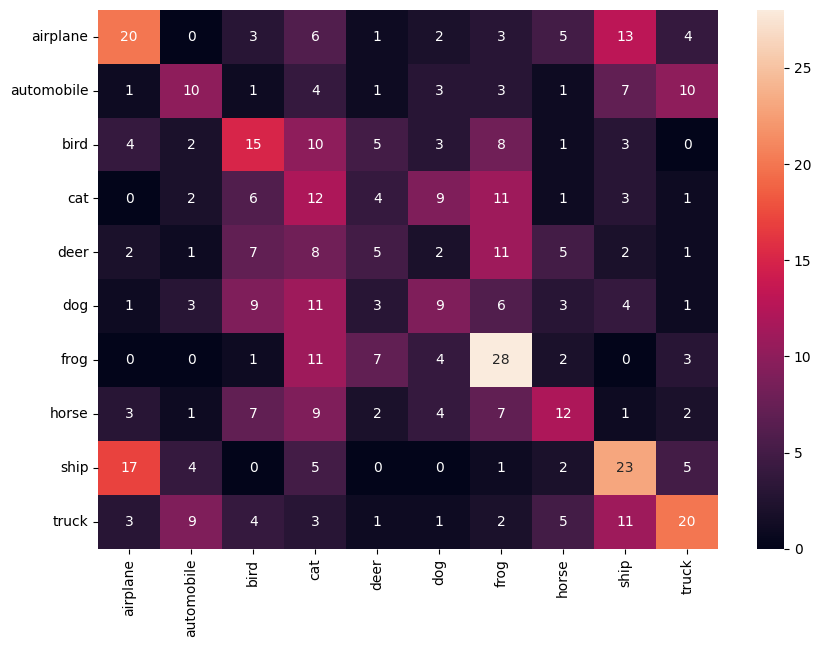

In [9]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [10]:
loaded_model = tf.keras.models.load_model('../saved_models/caps_net-CIFAR-10', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  62464     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2986128   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense_2 (Dense)             multiple                  1049600   
                                                                 
Total params: 6,180,496
Trainable params: 6,180,496
Non-trainable params: 0
_________________________________________________________________
